In [ ]:
!pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Correct class selector: product thumbnails
products = soup.select("div.thumbnail")

data = []
for product in products:
    title = product.select_one("a.title")
    price = product.select_one("h4.price")
    description = product.select_one("p.description")

    if title and price and description:
        data.append({
            "Title": title.text.strip(),
            "Price": price.text.strip(),
            "Description": description.text.strip()
        })

# Save to CSV if data was found
if data:
    df = pd.DataFrame(data)
    df.to_csv("laptop_data.csv", index=False)
    print("✅ Scraping complete! Data saved.")
else:
    print("⚠️ No product data found.")


✅ Scraping complete! Data saved.


In [ ]:
df = pd.read_csv("laptop_data.csv")
df.head()


,Title,Price,Description
0,Packard 255 G2,$416.99,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows..."
1,Aspire E1-510,$306.99,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux"
2,ThinkPad T540p,$1178.99,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit"
3,ProBook,$739.99,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit"
4,ThinkPad X240,$1311.99,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro..."


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        6 non-null      object
 1   Price        6 non-null      object
 2   Description  6 non-null      object
dtypes: object(3)
memory usage: 276.0+ bytes


,Title,Price,Description
count,6,6,6
unique,6,6,6
top,Packard 255 G2,$416.99,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows..."
freq,1,1,1


In [ ]:
df["Price"] = df["Price"].str.replace("$", "").astype(float)


In [ ]:
print("Max Price:", df["Price"].max())
print("Min Price:", df["Price"].min())
print("Average Price:", df["Price"].mean())


Max Price: 1311.99
Min Price: 306.99
Average Price: 756.1566666666666


In [ ]:
from collections import Counter

words = " ".join(df["Title"]).split()
common_words = Counter(words)
print(common_words.most_common(10))


[('Aspire', 2), ('ThinkPad', 2), ('Packard', 1), ('255', 1), ('G2', 1), ('E1-510', 1), ('T540p', 1), ('ProBook', 1), ('X240', 1), ('E1-572G', 1)]


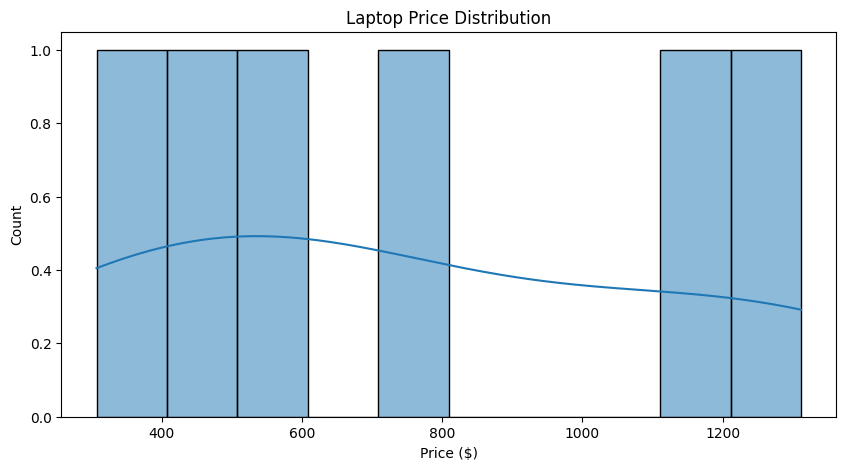

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=10, kde=True)
plt.title("Laptop Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()


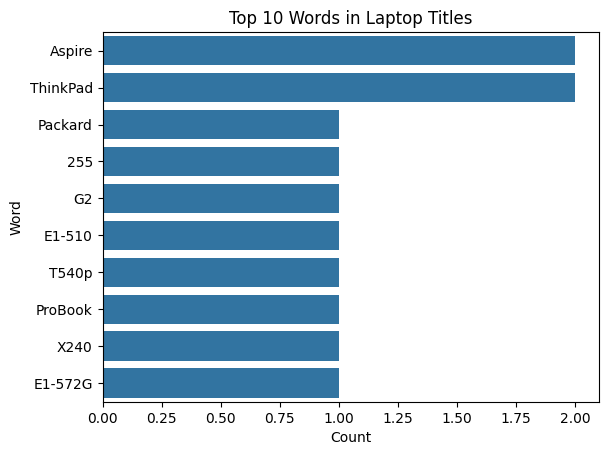

In [ ]:
import pandas as pd

common_df = pd.DataFrame(common_words.most_common(10), columns=["Word", "Count"])
sns.barplot(data=common_df, x="Count", y="Word")
plt.title("Top 10 Words in Laptop Titles")
plt.show()


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df["Description"].isnull().sum()


np.int64(0)

In [ ]:
df[df["Price"] > 2000]  # Example threshold


,Title,Price,Description


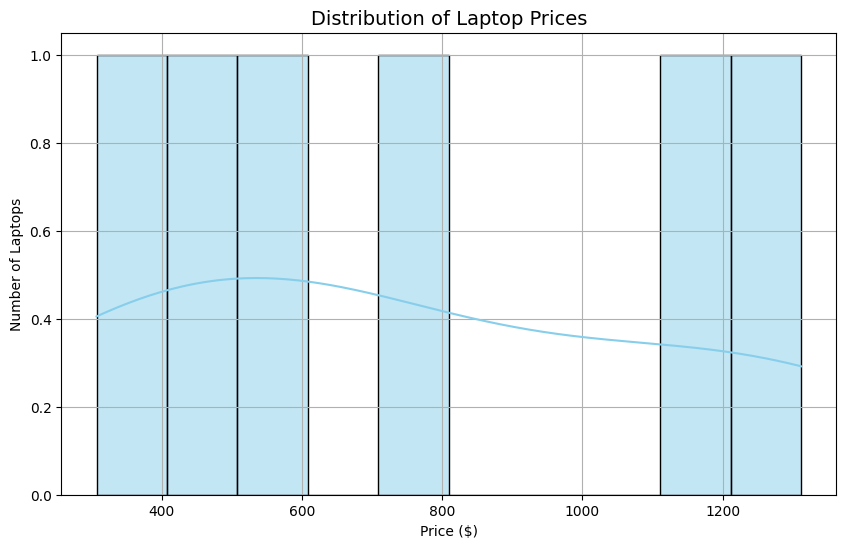

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Laptop Prices", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Number of Laptops")
plt.grid(True)
plt.show()


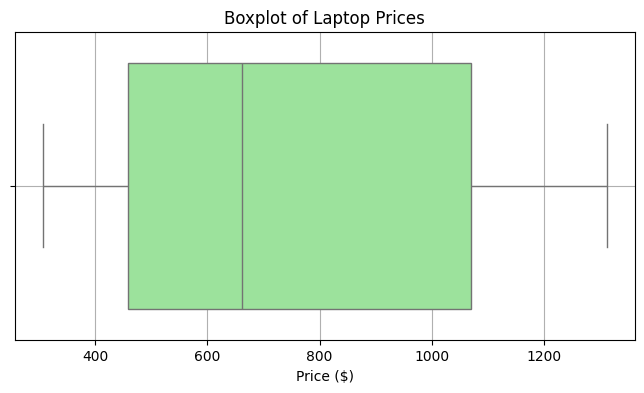

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Price"], color="lightgreen")
plt.title("Boxplot of Laptop Prices")
plt.xlabel("Price ($)")
plt.grid(True)
plt.show()


/tmp/ipython-input-20-422428828.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_df, x="Count", y="Word", palette="viridis")


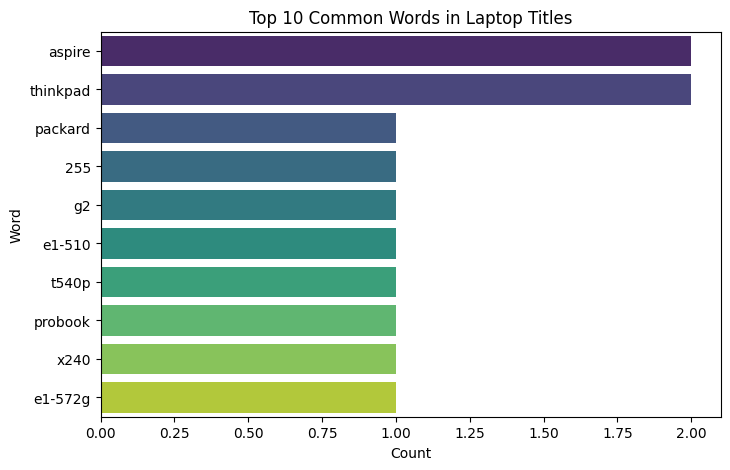

In [ ]:
from collections import Counter

# Clean words
words = " ".join(df["Title"]).lower().split()
stopwords = ["the", "with", "and", "for", "laptop", "notebook"]
filtered_words = [word for word in words if word not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)

# Convert to DataFrame for plotting
word_df = pd.DataFrame(top_words, columns=["Word", "Count"])

plt.figure(figsize=(8, 5))
sns.barplot(data=word_df, x="Count", y="Word", palette="viridis")
plt.title("Top 10 Common Words in Laptop Titles")
plt.show()


In [ ]:
!pip install textblob



In [ ]:
import pandas as pd

# Sample simulated reviews
data = {
    "Product": ["HP Pavilion", "Dell Inspiron", "Lenovo ThinkPad", "Asus VivoBook", "Acer Aspire"],
    "Review": [
        "Absolutely love this laptop! Fast, sleek and reliable.",
        "Not impressed. Battery life is terrible and it lags a lot.",
        "Good value for the price. Performs well for daily tasks.",
        "Decent performance, but screen quality could be better.",
        "Worst laptop ever. Crashed within a week. Avoid it!"
    ]
}

df = pd.DataFrame(data)
df.head()


,Product,Review
0,HP Pavilion,"Absolutely love this laptop! Fast, sleek and r..."
1,Dell Inspiron,Not impressed. Battery life is terrible and it...
2,Lenovo ThinkPad,Good value for the price. Performs well for da...
3,Asus VivoBook,"Decent performance, but screen quality could b..."
4,Acer Aspire,Worst laptop ever. Crashed within a week. Avoi...


In [ ]:
from textblob import TextBlob

# Apply sentiment polarity
df["Polarity"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
def get_sentiment(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Polarity"].apply(get_sentiment)
df


,Product,Review,Polarity,Sentiment
0,HP Pavilion,"Absolutely love this laptop! Fast, sleek and r...",0.412500,Positive
1,Dell Inspiron,Not impressed. Battery life is terrible and it...,-0.750000,Negative
2,Lenovo ThinkPad,Good value for the price. Performs well for da...,0.350000,Positive
3,Asus VivoBook,"Decent performance, but screen quality could b...",0.333333,Positive
4,Acer Aspire,Worst laptop ever. Crashed within a week. Avoi...,-1.000000,Negative


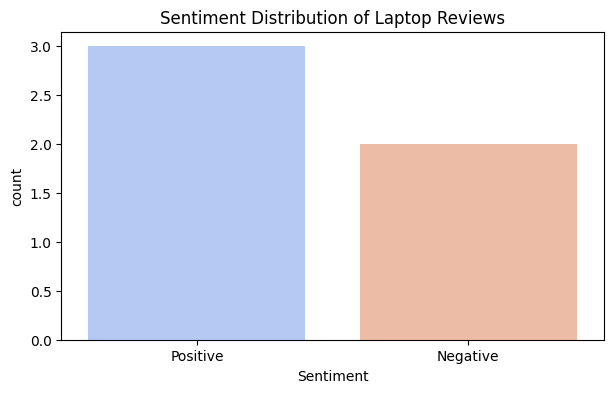

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution of Laptop Reviews")
plt.show()
